In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.rename(columns={'Genre': 'Gender'}, inplace=True)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.describe().round(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


<Axes: >

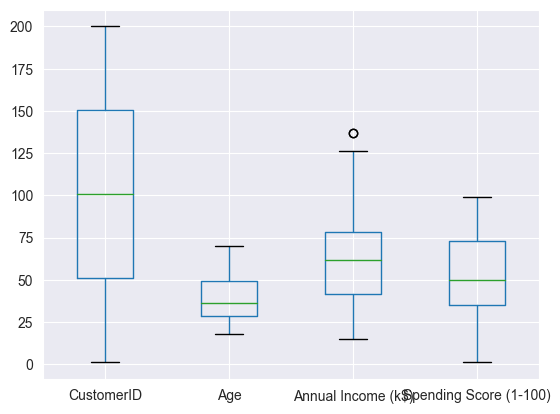

In [6]:
data.boxplot()

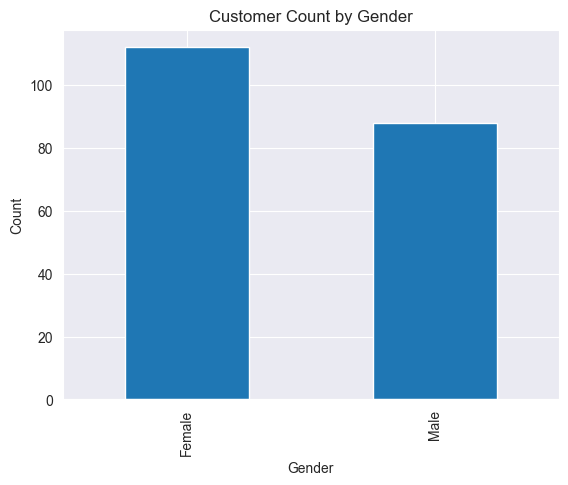

In [7]:
gender_data = data.groupby('Gender').size()
gender_data.plot(kind='bar')
plt.title('Customer Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<h5>Phân bố tuổi</h5>

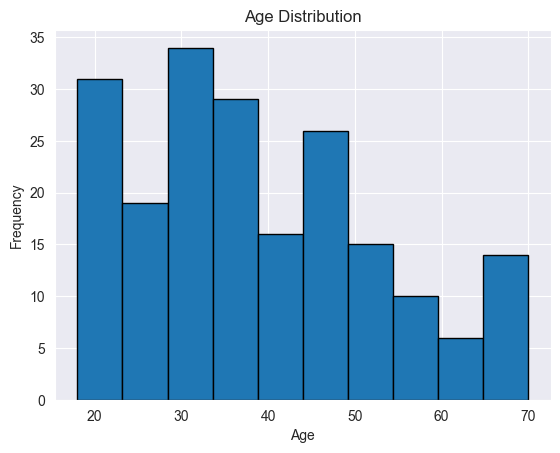

In [8]:
age_data = data['Age']
age_data.plot(kind='hist', bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

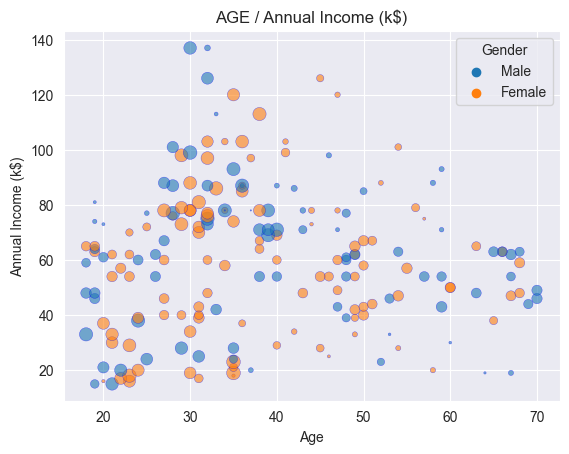

In [9]:
import seaborn

size = data['Spending Score (1-100)']

seaborn.scatterplot(x='Age',y='Annual Income (k$)', data=data, hue='Gender',color = 'deepskyblue', s = size, alpha = 0.6,  edgecolor = 'b')
plt.title('AGE / Annual Income (k$)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

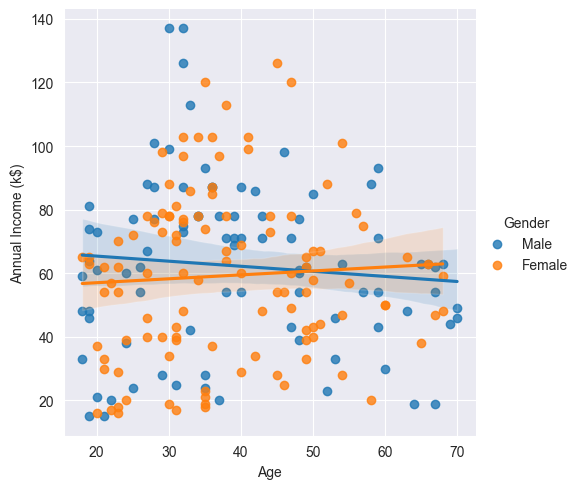

In [10]:
seaborn.lmplot(data=data, x='Age', y='Annual Income (k$)', hue='Gender')
plt.show()

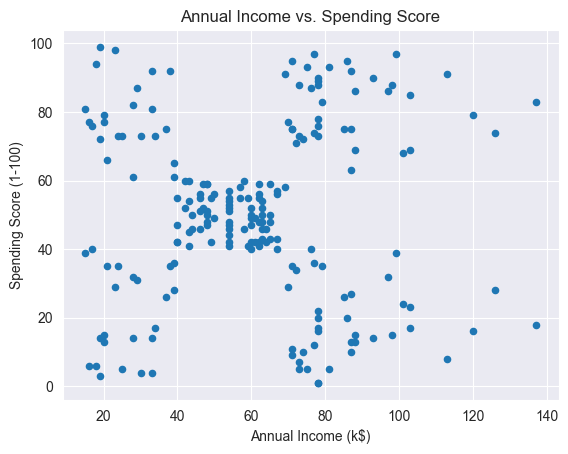

In [11]:
income_spending_data = data[['Annual Income (k$)', 'Spending Score (1-100)']]
income_spending_data.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.show()

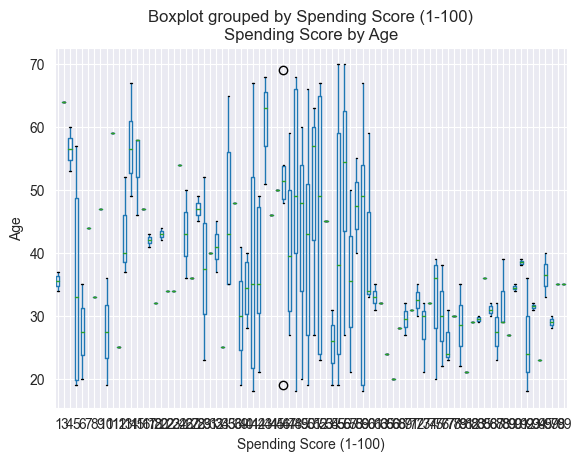

In [12]:
age_spending_data = data[['Age', 'Spending Score (1-100)']]
age_spending_data.boxplot(by='Spending Score (1-100)')
plt.title('Spending Score by Age')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


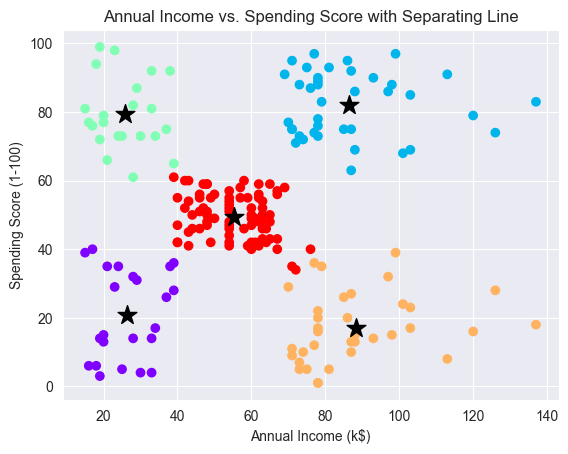

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(income_spending_data)
centers = kmeans.cluster_centers_
plt.scatter(income_spending_data['Annual Income (k$)'],
            income_spending_data['Spending Score (1-100)'],
            c=kmeans.labels_,
            cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='black')
plt.title('Annual Income vs. Spending Score with Separating Line')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [14]:
data1 = data.copy()
data1['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [15]:
from sklearn.preprocessing import StandardScaler

X = data1.values
X = numpy.nan_to_num(X)

sc = StandardScaler()

# cluster_data = sc.fit_transform(X)
# print(colored('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])
data1
print(X)

[[  1   1  19  15  39]
 [  2   1  21  15  81]
 [  3   0  20  16   6]
 [  4   0  23  16  77]
 [  5   0  31  17  40]
 [  6   0  22  17  76]
 [  7   0  35  18   6]
 [  8   0  23  18  94]
 [  9   1  64  19   3]
 [ 10   0  30  19  72]
 [ 11   1  67  19  14]
 [ 12   0  35  19  99]
 [ 13   0  58  20  15]
 [ 14   0  24  20  77]
 [ 15   1  37  20  13]
 [ 16   1  22  20  79]
 [ 17   0  35  21  35]
 [ 18   1  20  21  66]
 [ 19   1  52  23  29]
 [ 20   0  35  23  98]
 [ 21   1  35  24  35]
 [ 22   1  25  24  73]
 [ 23   0  46  25   5]
 [ 24   1  31  25  73]
 [ 25   0  54  28  14]
 [ 26   1  29  28  82]
 [ 27   0  45  28  32]
 [ 28   1  35  28  61]
 [ 29   0  40  29  31]
 [ 30   0  23  29  87]
 [ 31   1  60  30   4]
 [ 32   0  21  30  73]
 [ 33   1  53  33   4]
 [ 34   1  18  33  92]
 [ 35   0  49  33  14]
 [ 36   0  21  33  81]
 [ 37   0  42  34  17]
 [ 38   0  30  34  73]
 [ 39   0  36  37  26]
 [ 40   0  20  37  75]
 [ 41   0  65  38  35]
 [ 42   1  24  38  92]
 [ 43   1  48  39  36]
 [ 44   0  

In [16]:
clusters = 3
model = KMeans(init='k-means++', n_clusters=clusters, n_init=10)

In [17]:
model.fit(X)
labels = model.labels_

In [18]:
data1['Clusters Labels'] = labels
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters Labels
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,1
197,198,1,32,126,74,1
198,199,1,32,137,18,1


In [19]:
from termcolor import colored

print(colored(data1.groupby('Clusters Labels').mean(), attrs=['bold']))

                 CustomerID    Gender        Age  Annual Income (k$)  \
Clusters Labels                                                        
0                 96.985915  0.464789  43.197183           59.352113   
1                166.500000  0.455882  36.044118           88.911765   
2                 31.016393  0.393443  36.918033           30.360656   

                 Spending Score (1-100)  
Clusters Labels                          
0                             50.591549  
1                             50.205882  
2                             49.737705  


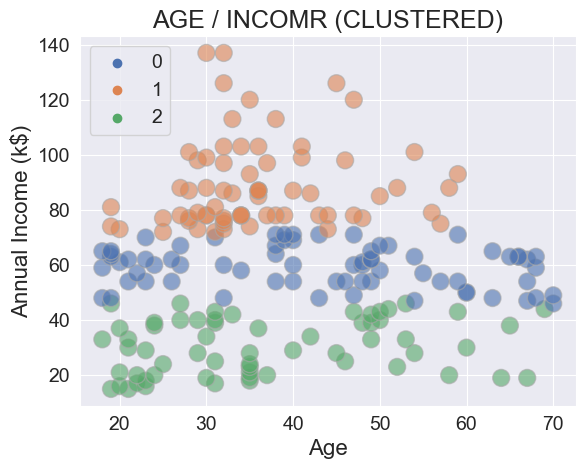

In [20]:
seaborn.scatterplot(x='Age', y='Annual Income (k$)', data = data1, s = 150, hue = 'Clusters Labels', palette = 'deep', alpha = 0.6, edgecolor = 'darkgrey')
plt.title('AGE / INCOMR (CLUSTERED)', fontsize = 18)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Annual Income (k$)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.show()

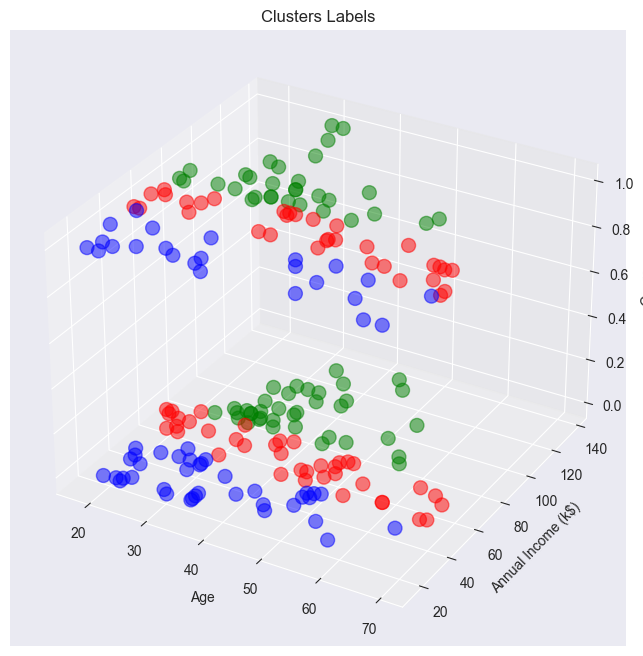

In [21]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Genre")
ax.set_title("Clusters Labels")

colors = ['r', 'g', 'b']

for i, c in enumerate(colors):
    clustered_data = data1[data1['Clusters Labels'] == i]
    ax.scatter(clustered_data['Age'], clustered_data['Annual Income (k$)'], clustered_data['Gender'], c=c, s=100, alpha=0.5)

plt.show()